In [1]:
import simpy
import collections
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

from package import demand, pricing, inventory, hurricane

%matplotlib inline 

In [2]:
start_time = -2
end_time = 366
total_day = 365

MAX_FRESHNESS = 100
MAX_PRICE = 30

### pricing strategy

In [3]:
inventory_level = np.arange(0, 120, 1)

In [4]:
price_strategy = pricing.Price(max_price=MAX_PRICE)

linear = price_strategy.linear_price(inventory_level)
constant = [price_strategy.constant_price() for _ in range(len(inventory_level))]

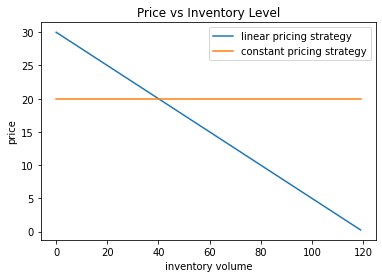

In [5]:
plt.plot(inventory_level, linear, label='linear pricing strategy')
plt.plot(inventory_level, constant, label='constant pricing strategy')
plt.title('Price vs Inventory Level')
plt.xlabel('inventory volume')
plt.ylabel('price')
plt.legend()

### Customers Arrival and Demand

In [6]:
customers = demand.Customers()
arrival_time = customers.get_arrival()
arrival_func = customers.arrival_function()
time = np.linspace(0, total_day, 10000)

(-2.0, 366.0)

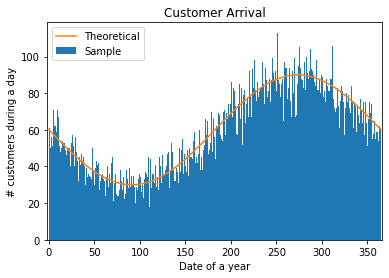

In [7]:
plt.hist(arrival_time, bins=total_day, label='Sample')
plt.plot(time, arrival_func(time), label='Theoretical')

plt.title('Customer Arrival')
plt.legend()
plt.xlabel('Date of a year')
plt.ylabel('# customers during a day')
plt.xlim(start_time, end_time)

In [8]:
price = np.arange(0, MAX_PRICE, 0.01)
freshness = np.arange(0, MAX_FRESHNESS, 0.01)
price, freshness = np.meshgrid(price, freshness)

demand_func = customers.demand_function()
max_demand = demand_func(price, freshness)

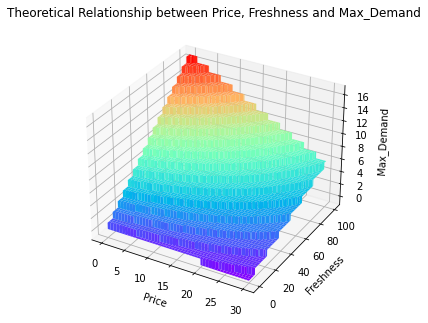

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(price, freshness, max_demand, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('Price')
ax.set_ylabel('Freshness')
ax.set_zlabel('Max_Demand')
plt.title('Theoretical Relationship between Price, Freshness and Max_Demand')
plt.show()

### Hurricane

In [10]:
hurr = hurricane.Hurricane()
month, dailyAvg = list(hurr.month_freq.keys()), list(hurr.month_freq.values())
monthlyAvg = [d*30 for d in dailyAvg]

In [11]:
N = 1000
sample = [list(np.floor(np.array(hurr.hurricane_simulation()) / 30) + 1) for _ in range(N)]
sample = sum(sample, [])

In [12]:
unique, counts = np.unique(sample, return_counts=True)

In [13]:
freq_map = collections.defaultdict(int)
for m in month:
    freq_map[m]
for m, c in zip(unique, counts):
    freq_map[int(m)] = c

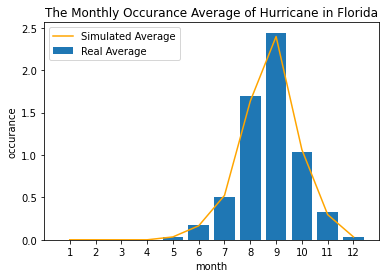

In [14]:
plt.bar(month, monthlyAvg, label='Real Average')
plt.plot(month, np.array(list(freq_map.values())) / N, label='Simulated Average', color='orange')
plt.xticks(month)
plt.title('The Monthly Occurance Average of Hurricane in Florida')
plt.ylabel('occurance')
plt.xlabel('month')
plt.legend()

### Inventory Simulation

In [15]:
inv = inventory.Inventory(debug=True)

def refill_every_ten_days(env, inv):
    while True:
        yield env.timeout(20)
        # refill the orange every 20 days with 30 volume
        inv.refill(env.now, 30)
        print('refill 30 oranges at t=%.2f' % env.now)

def sell_every_ten_days(env, inv):
    while True:
        yield env.timeout(10)
        # selling the orange every 10 days with 8 volume
        print('selling 8 oranges at t=%.2f' % env.now)
        inv.selling(8)

env = simpy.Environment()
env.process(inv.inventory_process(env))
env.process(refill_every_ten_days(env, inv))
env.process(sell_every_ten_days(env, inv))
env.run(until=365)

1 OrderedDict()
2 OrderedDict()
3 OrderedDict()
4 OrderedDict()
5 OrderedDict()
6 OrderedDict()
7 OrderedDict()
8 OrderedDict()
9 OrderedDict()
selling 8 oranges at t=10.00
The request is larger than our inventory level
10 OrderedDict()
11 OrderedDict()
12 OrderedDict()
13 OrderedDict()
14 OrderedDict()
15 OrderedDict()
16 OrderedDict()
17 OrderedDict()
18 OrderedDict()
19 OrderedDict()
refill 30 oranges at t=20.00
selling 8 oranges at t=20.00
20 OrderedDict([(20, 22)])
21 OrderedDict([(20, 22)])
22 OrderedDict([(20, 22)])
23 OrderedDict([(20, 22)])
24 OrderedDict([(20, 22)])
25 OrderedDict([(20, 22)])
26 OrderedDict([(20, 22)])
27 OrderedDict([(20, 22)])
28 OrderedDict([(20, 22)])
29 OrderedDict([(20, 22)])
selling 8 oranges at t=30.00
30 OrderedDict([(20, 14)])
31 OrderedDict([(20, 14)])
32 OrderedDict([(20, 14)])
33 OrderedDict([(20, 14)])
34 OrderedDict([(20, 14)])
35 OrderedDict([(20, 14)])
The orange refill at t=20.00 are decayed (over 15 days), and 14.00 oranges are removed
36 O